In [1]:
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import Imputer
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn import linear_model
from sklearn.preprocessing import Imputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
# from sklearn
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%pylab inline

param3 = {'kernel':('rbf','poly','linear','sigmoid'),'degree':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,30,35,40,50],'C':[0.000001,0.00001,0.001,0.0001,0.01,1,10,100,1000,10000],'probability':[True,False]}
# param3 = {'kernel':('rbf','linear'),'degree':[1,2,3,4,5],'C':[0.000001,0.00001,0.0001],'probability':[True,False]}
# param = {'solver' : ('newton-cg', 'lbfgs', 'liblinear', 'sag'), 'C':[1,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000,200000,500000,1000000,2000000,5000000]}
# clf = GaussianNB()
# clf=svm.SVC()
# param2 = { 'n_estimators':[1,5,10,50,100,150,350,500,750,1000,1500,2000,2500,5000,7500,10000],'oob_score':('True','False'),'criterion':('gini','entropy')}

# rf = RandomForestClassifier()
clf=linear_model.LogisticRegression()
# clfgs = GridSearchCV(clf,param3)
# clf=tree.DecisionTreeClassifier()
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv("/home/mohitrbhardwaj/Desktop/kaggle/titanic/train.csv")
test_data = pd.read_csv("/home/mohitrbhardwaj/Desktop/kaggle/titanic/test.csv")
print(data.columns)
test_ind = test_data['PassengerId']
test_data=test_data.drop('PassengerId',1)
train_ind = data['PassengerId']
data=data.drop('PassengerId',1)
data=data.drop('Name',1)
test_data=test_data.drop('Name',1)
test_data.shape
# data=data.drop('Pclass',1)
# test_data=test_data.drop('',1)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


(418, 9)

In [12]:
train_label=data['Survived']
final_data=data.drop('Survived',1)
merged = pd.concat([final_data,test_data])
final_data = merged

In [13]:
fill_miss = Imputer(missing_values='NaN',strategy='median',copy=True)

In [14]:
dummy_data = pd.get_dummies(final_data)

In [15]:
complete_dummy_data = fill_miss.fit_transform(dummy_data.values)

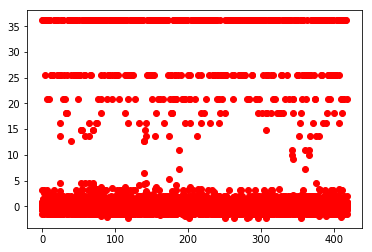

In [16]:
sc = StandardScaler()
complete_scaled_data = sc.fit_transform(complete_dummy_data)
complete_scaled_train_data= complete_scaled_data[:891]
complete_scaled_test_data=complete_scaled_data[891:]
# complete_scaled_test_data = sc.fit_transform(test_dummy_data)
# print
# print(complete_scaled_data[0])
plt.plot(complete_scaled_test_data, 'ro')
# plt.axis([0, 6, 0, 20])
plt.show()

In [19]:
# dtrain = xgb.DMatrix(data=complete_scaled_train_data, label=train_ind)
# dtest = xgb.DMatrix(data=complete_scaled_test_data)
# bst = xgb.cv(params, dtrain, 10000, NFOLDS, early_stopping_rounds=50, verbose_eval=25)
# 
# best_rounds = np.argmin(bst['test-mlogloss-mean'])
# 
# bst = xgb.train(params, dtrain[:500], best_rounds)
# bst = xgb.cv(params, dtrain, 10000, NFOLDS, early_stopping_rounds=50, verbose_eval=25)
# 
# best_rounds = np.argmin(bst['test-mlogloss-mean'])
# 
# bst = xgb.train(params, dtrain[:600], best_rounds[:600])
# res= bst.predict(dtest)

In [21]:
clfgs.fit(complete_scaled_train_data[:500], train_label[:500])
clfgs.fit(complete_scaled_train_data[601:],train_label[601:])
test_ind = test_data['PassengerId']
# print(complete_scaled_test_data)
print(clfgs.score(complete_scaled_train_data[501:600], train_label[501:600]))
clfgs.fit(complete_scaled_train_data[501:600], train_label[501:600])

ValueError: Invalid parameter degree for estimator LogisticRegression. Check the list of available parameters with `estimator.get_params().keys()`.

In [24]:
res=clfgs.predict(complete_scaled_test_data)
print(res)

[0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 1 0 0 0]


In [25]:
print(test_data.describe())
print(test_data.head())
sol = pd.DataFrame()
print(len(res))
print(len(sol))
sol['PassengerId'] = test_ind
sol["Survived"] = res
sol.to_csv("submission.csv",index=False)

           Pclass         Age       SibSp       Parch        Fare
count  418.000000  332.000000  418.000000  418.000000  417.000000
mean     2.265550   30.272590    0.447368    0.392344   35.627188
std      0.841838   14.181209    0.896760    0.981429   55.907576
min      1.000000    0.170000    0.000000    0.000000    0.000000
25%      1.000000   21.000000    0.000000    0.000000    7.895800
50%      3.000000   27.000000    0.000000    0.000000   14.454200
75%      3.000000   39.000000    1.000000    0.000000   31.500000
max      3.000000   76.000000    8.000000    9.000000  512.329200
   Pclass     Sex   Age  SibSp  Parch   Ticket     Fare Cabin Embarked
0       3    male  34.5      0      0   330911   7.8292   NaN        Q
1       3  female  47.0      1      0   363272   7.0000   NaN        S
2       2    male  62.0      0      0   240276   9.6875   NaN        Q
3       3    male  27.0      0      0   315154   8.6625   NaN        S
4       3  female  22.0      1      1  3101298  12.